In [0]:
""""Conventions:
lab a la place de labyrinthe/laby/labyr...
cel a la place de cellulaire


labCel: premiers  elements lignes
        deuxiemes elements cellules
            dernier element murs, vide (informations) de la cellule
        exemple:
        (((m,m,v,m),(m,m,m,v)),((m,m,m,m),(m,m,m,m)))
          \cellule0/\cellule1/  \cellule0/\cellule1/
         \________ligne0_____/ \___ligne1__________/
         \___________labyrinthe____________________/
"""

#0eme  valeur droite
#1ere  valeur gauche
#2eme valeur bas
#3eme valeur haut
m = True
v = False

In [0]:
def coordLigneVer(x,y,s):
    return [(x,y-s),(x,y)]

def coordLigneHor(x,y,s):
    return [(x,y),(x-s,y)]

In [86]:
class cell:
    def __init__(self):
        self.d = False
        self.g = False
        self.h = False
        self.b = False
    def __init__(self,d,g,h,b):
        self.d = bool(d)
        self.g = bool(g)
        self.h = bool(h)
        self.b = bool(b)
    def __repr__(self):
        return '(d:'+str(self.d) +', g:'+ repr(self.g) +', h:'+ repr(self.h) +', b:'+ repr(self.b) + ')'

    def __str__(self):
        return '(d:'+repr(self.d) +', g:'+ repr(self.g) +', h:'+ repr(self.h) +', b:'+ repr(self.b) + ')'
    def affiche(self,x,y,size):
        cellG = Graphics()
        x = x - 1 + size
        y = y - 1 + size
        cellG += circle((x+(1-size)/2,y+(1-size)/2),1-size,fill = True,facecolor = "brown")
        if self.d != v:
            cellG += line2d(coordLigneVer(x,y,size),color = "blue",thickness = 2)
        if self.g != v:
            cellG += line2d(coordLigneVer(x - size,y,size),color = "yellow",thickness = 2)
        if self.h != v:
            cellG += line2d(coordLigneHor(x,y ,size),color = "blue",thickness = 2)
        if self.b != v:
            cellG += line2d(coordLigneHor(x,y-size,size),color = "yellow",thickness = 2)
        return cellG

In [87]:
class Position:
    def __init__(self):
        self.x = 0
        self.y = 0
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"
    def __str__(self):
        return "("+str(self.x)+","+str(self.y)+")"
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, other):
        return Position(self.x + other.x,self.y + other.y)
    def affiche(self,x,y):
        pos = circle((self.x+x,self.y+y),0.2)

In [88]:
"""différences avec cell :
              -affichage:
                  -gris
                  -pastille qui se colore si la case est reliée aux autres
              -variable:
                  -linked : booleen, qui s'active si la cellule est connectée au reste du labyrinthe.
              """
class cell_g:#classe utilisée pour générer un labyrinthe avec les fonctions avec des liens.
    def __init__(self):
        self.d = False
        self.g = False
        self.h = False
        self.b = False
        self.linked = False
    def __init__(self,d,g,h,b,linked):
        self.d = bool(d)
        self.g = bool(g)
        self.h = bool(h)
        self.b = bool(b)
        self.linked = bool(linked)
    def __repr__(self):
        return '{(d:'+str(self.d) +', g:'+ repr(self.g) +', h:'+ repr(self.h) +', b:'+ repr(self.b) + '),'+(self.linked)+'}'

    def __str__(self):
        return '{(d:'+str(self.d) +', g:'+ repr(self.g) +', h:'+ repr(self.h) +', b:'+ repr(self.b) + '),'+repr(self.linked)+'}'
    def __eq__(self,other):
        return self.d == other.d and self.g == other.g and self.b == other.b and self.h == other.h and self.linked == other.linked
    def affiche(self,x,y,size):
        cellG = Graphics()
        x = x - 1 + size
        y = y - 1 + size
        if self.linked:
            circleColor = "green"
        else:
            circleColor = "red"
        cellG += circle((x+(1-size)/2,y+(1-size)/2),(1-size)/1.3,fill = True,facecolor = circleColor,thickness = 0)
        if self.d != v:
            cellG += line2d(coordLigneVer(x,y,size),color = "black",thickness = 2)
        if self.g != v:
            cellG += line2d(coordLigneVer(x - size,y,size),color = "black",thickness = 2)
        if self.h != v:
            cellG += line2d(coordLigneHor(x,y ,size),color = "black",thickness = 2)
        if self.b != v:
            cellG += line2d(coordLigneHor(x,y-size,size),color = "black",thickness = 2)
        return cellG

{(d:True, g:True, h:True, b:True),False}


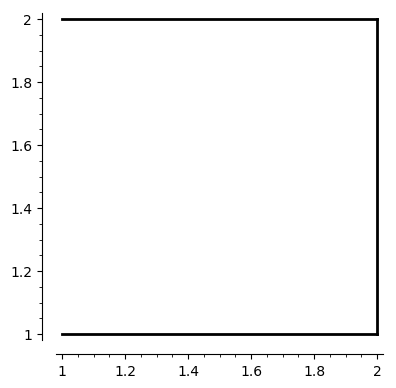

In [89]:
Cell = cell_g(True,True,True,True,False)
print(Cell)
Cell.g = False
Cell.affiche(2,2,1).show()

In [90]:
def verifieEnceinte(labC):
    for cellsL1 in labC[0]:
        if cellsL1.b == v:
            return False
    for cellsLn in labC[len(labC)-1]:
        if cellsLn.h == v:
            return False
    for ligne in labC:
        if ligne[0].g == v:
            return False
        if ligne[len(ligne)-1].d == v:
            return False
    return true

In [91]:
#vérifie pairs à pairs les murs placés par les cellules
def verifieCellsLab(labC):
    lastUpWalls = [m for i in range(len(labC[0]))]
    for ligne in labC:
        lastRightWall = m
        for cellIndex,cell in enumerate(ligne):
            leftWall = cell.g
            upWall = cell.h
            downWall = cell.b
            if lastUpWalls[cellIndex] != downWall:
                cell.affiche(200,200,1).show()
                afficheLabCel([ligne],2,2).show()
                print(cellIndex)
                return False
            if lastRightWall != leftWall:
                cell.affiche(-2,-2,1).show()
                return False
            lastRightWall = cell.d
            lastUpWalls[cellIndex] = upWall
    return True


In [92]:
def verifiePseudoLab(labC):
    return verifieEnceinte(labC) and verifieCellsLab(labC)

In [93]:
def verifieNombreMurLab(lab):
    m = len(lab)
    n = len(lab[0])
    emptyWalls = 0
    for line in lab:
        for cell in line:
            if not cell.h:
                emptyWalls +=1
            if not cell.d:
                emptyWalls +=1
    return m*n -1 == emptyWalls

In [94]:
def generateNewPositions(cell,pos):
    posList = []
    if not cell.h:
        posList.append(Position(pos.x,pos.y+1))
    if not cell.b:
        posList.append(Position(pos.x,pos.y-1))
    if not cell.d:
        posList.append(Position(pos.x+1,pos.y))
    if not cell.g:
        posList.append(Position(pos.x-1,pos.y))
    return posList

In [95]:
def verifieConnexitee(lab):
    vu = [Position(0,0)]
    last = 0
    while len(vu) < len(lab) * len(lab[0]):
        newElementAdded = True
        while newElementAdded:
            pos = Position(vu[last].x,vu[last].y)
            newElementAdded = False
            for newPos in generateNewPositions(lab[pos.y][pos.x],pos):
                if not newPos in vu:
                    vu.append(newPos)
                    newElementAdded = True
                    last = len(vu)-1
        if last < 0:
            return False
        else:
            last -=1
    return True

In [96]:
def verifieConnexiteeComplexite(lab):
    vu = [Position(0,0)]
    acc = 0
    last = 0
    while len(vu) < len(lab) * len(lab[0]):
        newElementAdded = True
        while newElementAdded:
            pos = Position(vu[last].x,vu[last].y)
            newElementAdded = False
            for newPos in generateNewPositions(lab[pos.y][pos.x],pos):
                if not newPos in vu:
                    vu.append(newPos)
                    acc+=1
                    newElementAdded = True
                    last = len(vu)-1
        if last < 0:
            return False
        else:
            last -=1
            acc+=1
    return acc

In [97]:
def verifieLab(lab):
    return verifiePseudoLab(lab) and verifieNombreMurLab(lab) and verifieConnexitee(lab)

In [98]:
def afficheLabCel(labC,offsetX,offsetY):
    listeMurs = Graphics()
    ligne = offsetX
    for ligneCel in labC:
        colonne= offsetY
        for Cel in ligneCel:
            listeMurs += Cel.affiche(colonne,ligne,0.9)
            colonne+=1
        ligne+=1
    return listeMurs


In [99]:
lab = ( (cell_g(v,m,m,m,False),cell_g(m,v,v,m,False)) , (cell_g(m,m,v,m,False),cell_g(m,m,v,v,False)) , (cell_g(v,m,m,v,False),cell_g(m,v,m,v,False)))

True
True


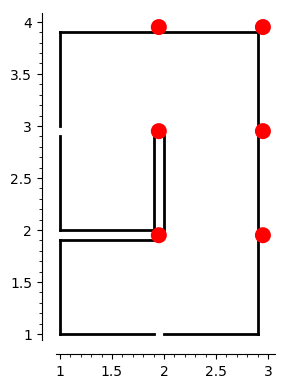

In [100]:
print verifiePseudoLab(lab)
print verifieConnexitee(lab)
afficheLabCel(lab,2,2)

In [101]:
vu = [(0,0), (1,0)]
print ((2,0) in vu)
print vu[len(vu)-1]

False
(1, 0)


In [102]:
verifieCellsLab(lab)

True

In [103]:
def addEdge(lab,(x,y),(x2,y2)):
    x = x
    y = y
    x2 = x2
    y2 = y2
    if x == x2:
        if y == y2:
            return
        else:
            for i in range(y,y2):
                if x < len(lab):
                    lab[x][i].h = True
                if x+1 < len(lab):
                    lab[x+1][i].b = True
    else:
        if y == y2:
            for i in range(x,x2):
                if y < len(lab[i]):
                    lab[i][y-1].d = True
                if y+1 < len(lab[i]):
                    lab[i][y].g = True
        else:
            return

In [104]:
def neighbors(G,u):
    neighbors = []
    if u[0] < G[0]-1:
        neighbors.append((u[0] + 1, u[1]))
    if u[1] < G[1]-1:
        neighbors.append((u[0], u[1]+1))
    return neighbors

In [105]:
def generateEmptyLab(m,n):
    EL =[]
    for i in range(m):
        line = []
        for j in range(n):
            line.append(cell(False,False,False,False))
        EL.append(line)
    return EL

In [106]:
def generateEmptyLabWithEnceint(m,n):
    EL =[]
    for i in range(m):
        line = []
        for j in range(n):
            newEmptyCell = cell(False,False,False,False)
            if i == 0:
                newEmptyCell.b = True
            if i == m-1:
                newEmptyCell.h = True
            if j == 0:
                newEmptyCell.g = True
            if j == n-1:
                newEmptyCell.d = True
            line.append(newEmptyCell)
        EL.append(line)
    return EL

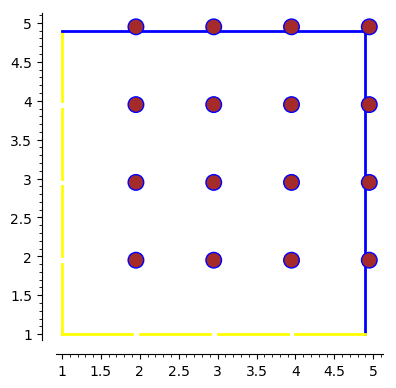

3 3


In [107]:
afficheLabCel(generateEmptyLabWithEnceint(4,4),2,2).show()
print(str(len(generateEmptyLabWithEnceint(3,3)))+" "+str(len(generateEmptyLabWithEnceint(3,3)[0])))

In [108]:
def generate_lab_prof(m,n):
    G = (m,n)
    vu = set()
    L = [] # insérer : L.append( ), retirer : L.popleft()
    A = generateEmptyLabWithEnceint(m,n) # le graphe de notre labyrinthe

    vu.add((0,0))
    L.append((0,0))

    while len(L)>0:
        u = L[0]
        L.remove(u)
        for v in neighbors(G,u):
            if v not in vu:
                L.append(v)
                vu.add(v)
                addEdge(A,u,v)

    return A

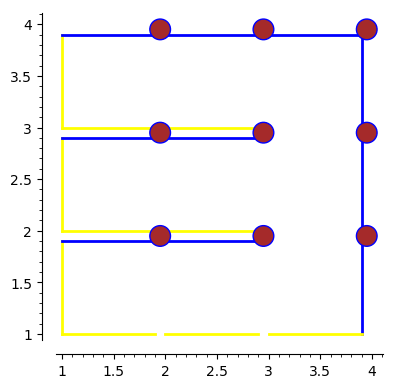

In [109]:
#((4, 0), (4, 1))
afficheLabCel(generate_lab_prof(3,3),2,2)

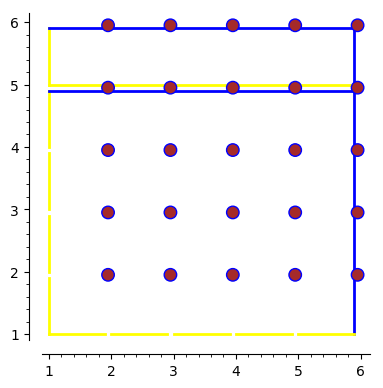

In [110]:
test_lab = generateEmptyLabWithEnceint(5,5)
addEdge(test_lab,(3,0),(3,5))
afficheLabCel(test_lab,2,2)

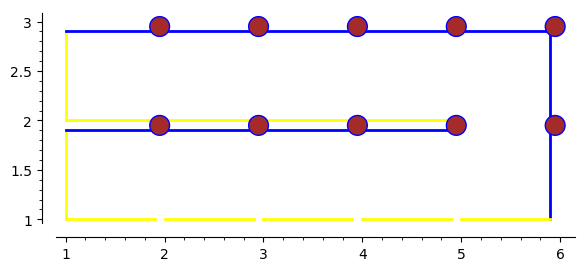

True


In [111]:
labProfmn = generate_lab_prof(2,5)
afficheLabCel(labProfmn,2,2).show()
print(verifieLab(labProfmn))

In [112]:
labProfmn

[[(d:False, g:True, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:True, g:False, h:False, b:True)],
 [(d:False, g:True, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:False, g:False, h:True, b:True),
  (d:True, g:False, h:True, b:False)]]

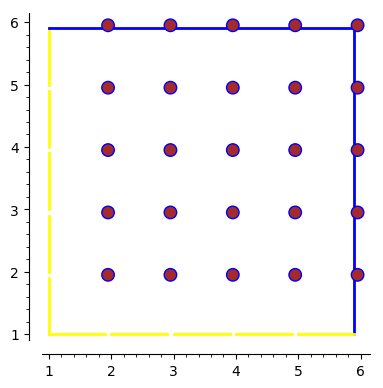

True

In [113]:
EL = generateEmptyLabWithEnceint(5,5)
addEdge(EL,(0, 0), (3, 0))
afficheLabCel(EL,2,2).show()
verifieConnexitee(generateEmptyLabWithEnceint(5,5))

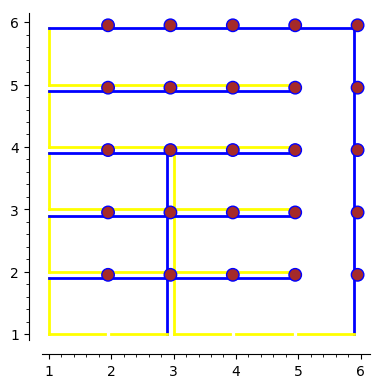

False


In [114]:
lab = generate_lab_prof(5,5)
addEdge(lab,(0,2),(3,2))
afficheLabCel(lab,2,2).show()
print(verifieConnexitee(lab))

In [115]:
verifieConnexitee(lab)

False

In [116]:
def generateFullLabCell_g(n,m):
    EL =[]
    for i in range(m):
        line = []
        for j in range(n):
            line.append(cell_g(True,True,True,True,False))
        EL.append(line)
    EL[m-1][n-1].linked = True
    return EL

In [117]:
def isValidChoice(lab,choice):
    position = choice[0]
    if choice ==  (position,Position(1,0)) and position.x < len(lab[0])-1 and lab[position.y][position.x].d and not lab[position.y][position.x+1].linked:
        return True
    if choice == (position,Position(-1,0)) and position.x > 0 and lab[position.y][position.x].g and not lab[position.y][position.x-1].linked:
        return True
    if choice == (position,Position(0,1)) and position.y < len(lab)-1 and lab[position.y][position.x].h and not lab[position.y+1][position.x].linked:
        return True
    if choice == (position,Position(0,-1)) and position.y > 0 and lab[position.y][position.x].b and not lab[position.y-1][position.x].linked:
        return True
    return False

In [118]:
def getChoices(lab,position):
    choices = []
    if position.x < len(lab[0])-1 and lab[position.y][position.x].d and not lab[position.y][position.x+1].linked:
        choices.append((position,Position(1,0)))
    if position.x > 0 and lab[position.y][position.x].g and not lab[position.y][position.x-1].linked:
        choices.append((position,Position(-1,0)))
    if position.y < len(lab)-1 and lab[position.y][position.x].h and not lab[position.y+1][position.x].linked:
        choices.append((position,Position(0,1)))
    if position.y > 0 and lab[position.y][position.x].b and not lab[position.y-1][position.x].linked:
        choices.append((position,Position(0,-1)))
    return choices

In [119]:
def getBackToAChoice(lab,path):
    i = len(path) - 1
    while(not getChoices(lab,path[i])):
        i-=1
        path.append(path[i])
    return path

In [120]:
def allLinked(labCell_g):
    for i in labCell_g:
        for j in i:
            if not j.linked:
                return False
    return True

In [121]:
def link(lab,(position,move)):
    cellBase = lab[position.y][position.x]
    positionGoal = position + move
    cellGoal = lab[positionGoal.y][positionGoal.x]
    cellGoal.linked = True
    if move == Position(1,0):
        cellBase.d = False
        cellGoal.g = False
    if move == Position(-1,0):
        cellBase.g = False
        cellGoal.d = False
    if move == Position(0,1):
        cellBase.h = False
        cellGoal.b = False
    if move == Position(0,-1):
        cellBase.b = False
        cellGoal.h = False
    return (position+move)

In [122]:
"premiere iteration"
import random
def generateOneLabCell_g(m,n):
    lab  = generateFullLabCell_g(m,n)
    pos  = Position(m-1,n-1)
    path = [pos]
    while(not allLinked(lab)):
        pos = path[len(path)-1]
        choices = getChoices(lab,pos)
        if choices:
            if len(choices)>1:
                choice = choices[ random.randint(0, len(choices)-1)]
            else:
                choice = choices[0]
            link(lab,choice)
            path.append(choice[0] + choice[1])
        else:
            path = getBackToAChoice(lab,path)
    return lab

In [123]:
def getBackToAValidChoice(lab,possibilities):
    toIterate = tuple(possibilities)
    for choice in toIterate:
        if isValidChoice(lab,choice):
            possibilities.remove(choice)
            return choice
        else:
            possibilities.remove(choice)

In [124]:
def newPos(lastChoice):
    return lastChoice[0] + lastChoice[1]

In [125]:
def howManyIn(choice,keptComparativePathes):
    if not keptComparativePathes:
        return 0
    tot = 0
    for i in keptComparativePathes:
        if choice in i:
            tot +=1
    return tot

In [126]:
howManyIn(((0,1),(0,1)),[[((0,1),(0,1))],[((0,1),(0,1))]])

2

In [127]:
def listClear(l):
    while len(l):
        l.pop(0)

In [128]:
def removePathWithChoice(keptComparativePathes,choiceCritter):
    kcp2 = list(keptComparativePathes)
    for item in kcp2:
        if choiceCritter not in item:
            keptComparativePathes.remove(item)

In [129]:
def chose(lab,keptComparativePathes,possibilities,position):
    finalChoices = []
    choices = getChoices(lab,position)
    numberOfSameOldChoices = 0
    if choices:
            thereIsAlreadyAFinalChoice = False
            for choice in choices:
                howMany = howManyIn(choice,keptComparativePathes)
                numberOfSameOldChoices += howMany
                #print("|"+str(howMany)+","+str(choice)+','+str(keptComparativePathes)+"|")
                if howMany==0:
                    listClear(keptComparativePathes)
                    finalChoices.append(choice)
    else:
        finalChoices.append(getBackToAValidChoice(lab,possibilities))

    if not finalChoices:
        finalChoices = [choices[numberOfSameOldChoices%len(choices)]]
        removePathWithChoice(keptComparativePathes,choice)
    return finalChoices

In [130]:
def removeNotValidChoices(lab,possibilities):
    poss2 = list(possibilities)
    for item in poss2:
        if not isValidChoice(lab,item):
            possibilities.remove(item)

In [131]:
def generateDifferentLabCell_g(m,n,comparativePathes):
    keptComparativePathes = list(comparativePathes) #pour ne pas le modifier (la modification se fait dans la fonction chose)
    lab  = generateFullLabCell_g(m,n)
    pos  = Position(m-1,n-1)
    possibilities = []
    choicesMade = []
    i = 0
    while(not allLinked(lab)):
        choicesPossible = chose(lab,keptComparativePathes,possibilities,pos) #print
        print keptComparativePathes
        finalChoice = choicesPossible.pop(0)
        for i in choicesPossible:
                possibilities.append(i)
        choicesMade.append(finalChoice)

        afficheLabCel(lab,2,2)
        link(lab,finalChoice)
        pos = newPos(finalChoice)
    comparativePathes.append(choicesMade)
    return lab

In [132]:
def chose2(lab,possibilities,position):
    finalChoices = []
    finalChoices = getChoices(lab,position)
    removeNotValidChoices(lab,possibilities)
    for i in possibilities:
        finalChoices.append(i)
    return finalChoices

In [133]:
def generateAllLabs(m,n):
    comparativePathes = []
    labs =[]
    for i in range(10):
        labs.append(generateDifferentLabCell_g(m,n,comparativePathes))
        print(" ")
        print(comparativePathes)
        print(" ")
        afficheLabCel(labs[len(labs)-1],2,2).show()
    return labs

In [134]:
def generateRandomLabCell_g(m,n):
    lab  = generateFullLabCell_g(m,n)
    pos  = Position(m-1,n-1)
    possibilities = []
    while(not allLinked(lab)):
        newChoices = getChoices(lab,pos)
        choiceIndex = random.randint(0, len(possibilities)+len(newChoices)-1)
        if choiceIndex < len(possibilities):
            finalChoice = possibilities.pop(choiceIndex)
        else:
            finalChoice = newChoices.pop(choiceIndex - len(possibilities))
        link(lab,finalChoice)
        for i in newChoices:
            possibilities.append(i)
        pos = newPos(finalChoice)
        removeNotValidChoices(lab,possibilities)
    return lab

In [135]:
(generateRandomLabCell_g(50,50))
2

2

In [136]:
generateRandomLabCell_g(4,4)
2

2

In [137]:
def egalCell(cell1,cell2):
    for cw,cellWall in cell1[0]:
        if cellWall != cell2[cw]:
            return False
    return True

In [138]:
def egalLab(l1,l2):
    if(len(l1)==len(l2) and len(l1[0])==len(l2[0])):
        for cl,line in enumerate(l1):
            for cc,cell in enumerate(line):
                if not cell == l2[cl][cc]:
                    return False
    else:
        return False
    return True

In [139]:
def labInLabs(lab,labs):
    for i in labs:
        if egalLab(i,lab):
            return True
    return False

In [140]:
def symHCell_g(cell):
    return cell_g(cell.d,cell.g,cell.b,cell.h,cell.linked)

In [141]:
import copy
def symHLab(lab):
    symLabSource = copy.deepcopy(lab)
    symLab = copy.deepcopy(lab)
    lenLab = len(lab)-1
    for cl,line in enumerate(symLabSource):
        for cc,cellRef in enumerate(line):
            symLab[lenLab - cl][cc] = symHCell_g(cellRef)
    return symLab

{(d:False, g:True, h:True, b:True),True}


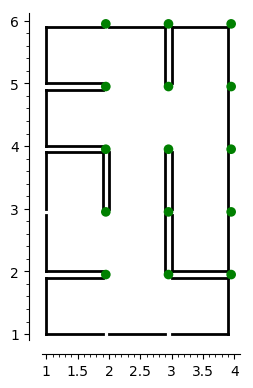

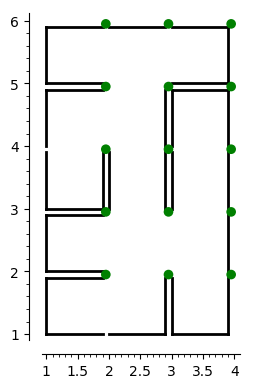

In [142]:
lab = generateRandomLabCell_g(3,5)
print(lab[0][0])
symLab = symHLab(lab)
afficheLabCel(lab,2,2).show()
afficheLabCel(symLab,2,2).show()

In [143]:
def symVCell_g(cell):
    return cell_g(cell.g,cell.d,cell.h,cell.b,cell.linked)

In [144]:
import copy
def symVLab(lab):
    symLabSource = copy.deepcopy(lab)
    symLab = copy.deepcopy(lab)
    lenLab = len(lab[0])-1
    for cl,line in enumerate(symLabSource):
        for cc,cellRef in enumerate(line):
            symLab[cl][lenLab - cc] = symVCell_g(cellRef)
    return symLab

{(d:False, g:True, h:True, b:True),True}


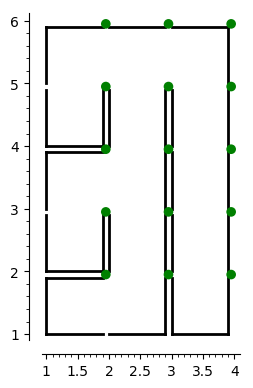

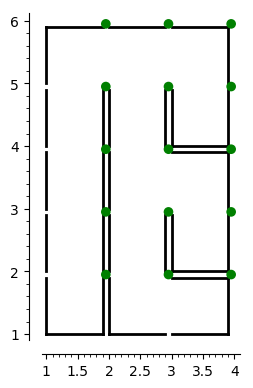

In [145]:
lab = generateRandomLabCell_g(3,5)
print(lab[0][0])
symLab = symVLab(lab)
afficheLabCel(lab,2,2).show()
afficheLabCel(symLab,2,2).show()

In [146]:
def rotatePlusCell_g(cell):
    return cell_g(cell.b,cell.h,cell.d,cell.g,cell.linked)

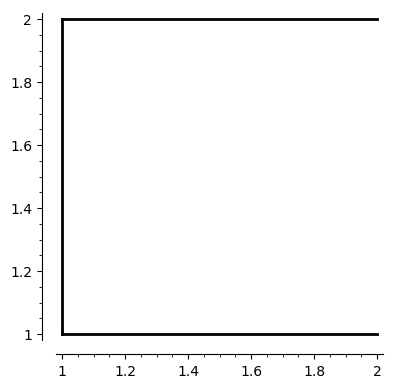

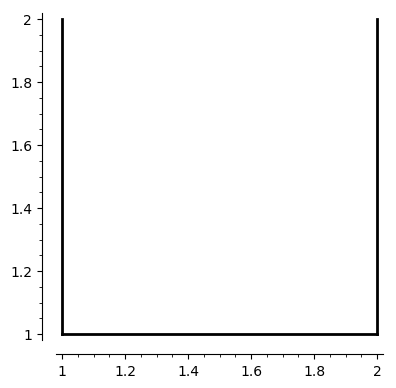

In [147]:
cell = cell_g(False,True,True,True,True)
cell.affiche(2,2,1).show()
cell2 = rotatePlusCell_g((cell))
cell2.affiche(2,2,1).show()

In [148]:
import copy
def rotatePlusSquareLab(lab):
    rotLabSource = copy.deepcopy(lab)
    rotLab = copy.deepcopy(lab)
    lenLab = len(lab)-1
    for cl,line in enumerate(rotLabSource):
        for cc,cellRef in enumerate(line):
            rotLab[cc][lenLab-cl] = rotatePlusCell_g(cellRef)
    return rotLab

{(d:False, g:True, h:True, b:True),True}


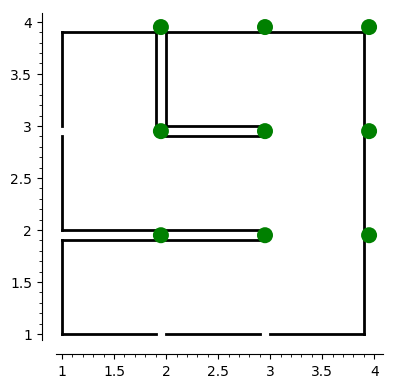

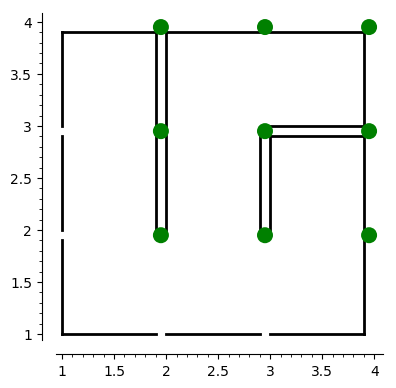

In [149]:
lab = generateRandomLabCell_g(3,3)
print(lab[0][0])
rotLab = rotatePlusSquareLab(rotatePlusSquareLab(rotatePlusSquareLab(lab)))
afficheLabCel(lab,2,2).show()
afficheLabCel(rotLab,2,2).show()

In [150]:
def rotateMoinsCell_g(cell):
    return cell_g(cell.h,cell.b,cell.g,cell.d,cell.linked)

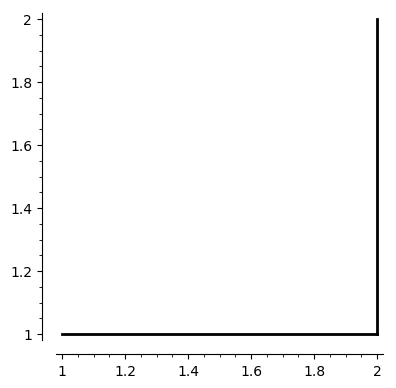

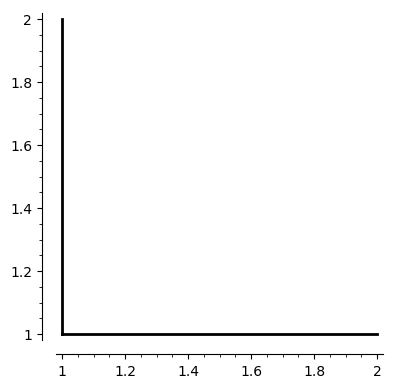

In [151]:
cell = cell_g(True,False,False,True,True)
cell.affiche(2,2,1).show()
cell2 = rotateMoinsCell_g((cell))
cell2.affiche(2,2,1).show()

In [152]:
import copy
def rotateMoinsSquareLab(lab):
    rotLabSource = copy.deepcopy(lab)
    rotLab = copy.deepcopy(lab)
    lenLab = len(lab)-1
    for cl,line in enumerate(rotLabSource):
        for cc,cellRef in enumerate(line):
            rotLab[lenLab - cc][cl] = rotateMoinsCell_g(cellRef)
    return rotLab

{(d:False, g:True, h:True, b:True),True}


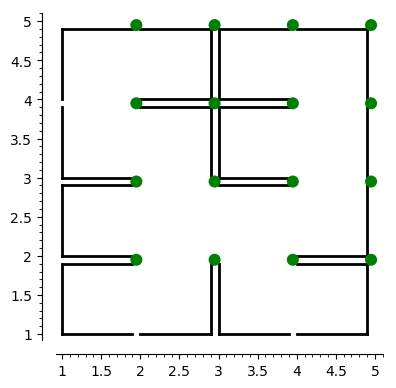

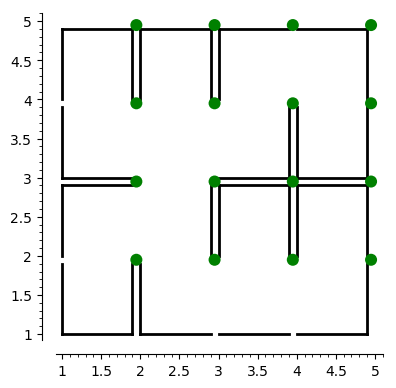

In [153]:
lab = generateRandomLabCell_g(4,4)
print(lab[0][0])
rotLab = rotateMoinsSquareLab(lab)
afficheLabCel(lab,2,2).show()
afficheLabCel(rotLab,2,2).show()

{(d:True, g:True, h:False, b:True),True}


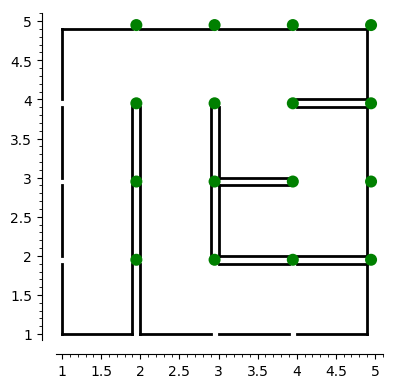

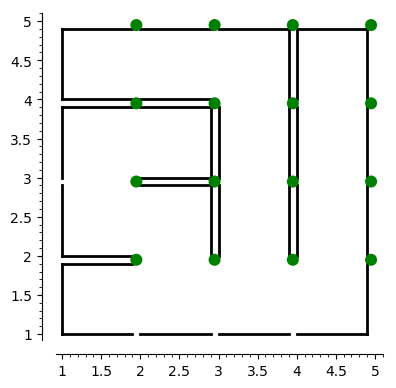

In [154]:
lab = generateRandomLabCell_g(4,4)
print(lab[0][0])
invLab   = symVLab(symHLab(lab))
afficheLabCel(lab,2,2).show()
afficheLabCel(invLab,2,2).show()

{(d:False, g:True, h:True, b:True),True}


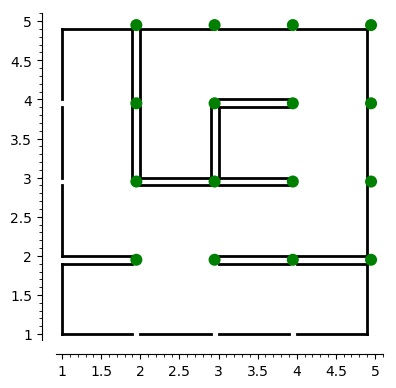

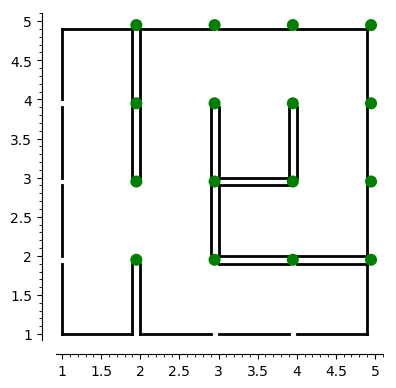

In [155]:
lab = generateRandomLabCell_g(4,4)
print(lab[0][0])
rotSymLab = symVLab(rotatePlusSquareLab(lab))
afficheLabCel(lab,2,2).show()
afficheLabCel(rotSymLab,2,2).show()

{(d:False, g:True, h:True, b:True),True}


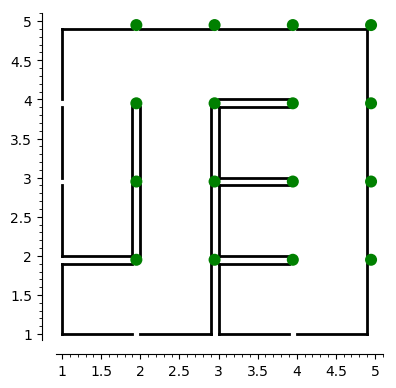

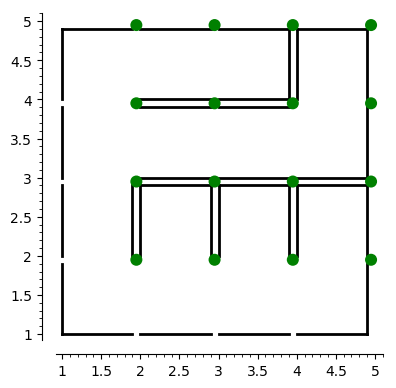

In [156]:
lab = generateRandomLabCell_g(4,4)
print(lab[0][0])
rotSymLab = symVLab(rotateMoinsSquareLab(lab))
afficheLabCel(lab,2,2).show()
afficheLabCel(rotSymLab,2,2).show()

In [157]:
def tryToAddLabs(labs,lab):
    if not labInLabs(lab,labs):
            labs.append(lab)
            return True
    else:
            return False

In [158]:
def generateRandomlyAllLabs(m,n,maxRepetition):
    labs = []
    labDiff = 0
    isSquare = m==n
    while(labDiff < maxRepetition):
        lab = generateRandomLabCell_g(m,n)
        if tryToAddLabs(labs,lab):
            labDiff = 0
            tryToAddLabs(labs,symHLab(lab))
            tryToAddLabs(labs,symVLab(lab))
            tryToAddLabs(labs,symVLab(symHLab(lab)))
            if isSquare:
                tryToAddLabs(labs,rotatePlusSquareLab(lab))
                tryToAddLabs(labs,rotateMoinsSquareLab(lab))
                tryToAddLabs(labs,symVLab(rotatePlusSquareLab(lab)))
                tryToAddLabs(labs,symVLab(rotateMoinsSquareLab(lab)))
        else:
            labDiff +=1
    print(len(labs))
    return labs

In [159]:
def generateRandomlyAllLabsFromExistingLabs(m,n,maxRepetition,labs):
    labDiff = 0
    isSquare = m==n
    while(labDiff < maxRepetition):
        lab = generateRandomLabCell_g(m,n)
        if tryToAddLabs(labs,lab):
            labDiff = 0
            tryToAddLabs(labs,symHLab(lab))
            tryToAddLabs(labs,symVLab(lab))
            tryToAddLabs(labs,symVLab(symHLab(lab)))
            if isSquare:
                tryToAddLabs(labs,rotatePlusSquareLab(lab))
                tryToAddLabs(labs,rotateMoinsSquareLab(lab))
                tryToAddLabs(labs,symVLab(rotatePlusSquareLab(lab)))
                tryToAddLabs(labs,symVLab(rotateMoinsSquareLab(lab)))
        else:
            labDiff +=1
    print(len(labs))

In [160]:
def generateRandomlyAllLabsWithNonSymmetricalGeneration(m,n,maxRepetition):
    labs = []
    labDiff = 0
    isSquare = m==n
    while(labDiff < maxRepetition):
        lab = generateOneLabCell_g(m,n)
        if tryToAddLabs(labs,lab):
            labDiff = 0
            tryToAddLabs(labs,symHLab(lab))
            tryToAddLabs(labs,symVLab(lab))
            tryToAddLabs(labs,symVLab(symHLab(lab)))
            if isSquare:
                tryToAddLabs(labs,rotatePlusSquareLab(lab))
                tryToAddLabs(labs,rotateMoinsSquareLab(lab))
                tryToAddLabs(labs,symVLab(rotatePlusSquareLab(lab)))
                tryToAddLabs(labs,symVLab(rotateMoinsSquareLab(lab)))
        else:
            labDiff +=1
    print(len(labs))
    return labs

In [161]:
lab22 = generateRandomlyAllLabs(2,2,1)

4


In [162]:
lab23 = generateRandomlyAllLabs(2,3,400)

15


In [163]:
lab24 = generateRandomlyAllLabs(2,4,1000)

56


In [164]:
lab25 = generateRandomlyAllLabs(2,5,3000)

209


In [165]:
lab26 = generateRandomlyAllLabs(2,6,6000)

780


In [166]:
lab3 = generateRandomlyAllLabs(3,3,800)

192


In [167]:
lab34 = generateRandomlyAllLabs(3,4,50000)

KeyboardInterrupt: 

In [0]:
print(len(lab34))

In [0]:
for i in lab3:
    afficheLabCel(i,2,2).show()

In [178]:
lab1 = generateRandomlyAllLabs(1,1,1)

1


In [134]:
def generateRandomLabCell_g(m,n):
    lab  = generateFullLabCell_g(m,n)
    pos  = Position(m-1,n-1)
    possibilities = []
    while(not allLinked(lab)):
        newChoices = getChoices(lab,pos)
        choiceIndex = random.randint(0, len(possibilities)+len(newChoices)-1)
        if choiceIndex < len(possibilities):
            finalChoice = possibilities.pop(choiceIndex)
        else:
            finalChoice = newChoices.pop(choiceIndex - len(possibilities))
        link(lab,finalChoice)
        for i in newChoices:
            possibilities.append(i)
        pos = newPos(finalChoice)
        removeNotValidChoices(lab,possibilities)
    return lab

In [1]:
def generateLabProc(n):
    labsList = [[],lab1,lab22]
    for i in range(2,n):
        base = generateFullLabCell_g(i+1,2)
        for lab in labsList[i]:
            toAdd = copy.deepcopy(base)
            countI = 0
            for line in lab:
                    counJ = 0
                for cell in line:
                    toAdd[countI][countJ] = celldef generateLabProc(n):
    labsList = [[],lab1,lab22]
        countI +=1r i in range(2,n):
        base = generateFullLabCell_g(i+1,2)
        for lab in labsList[i]:
            toAdd = copy.deepcopy(base)
            countI = 0
            for line in lab:
                countJ = 0
                for cell in line:
                    baseForToAdd[countI][countJ] = cell
                    countJ +=1
                countI +=1
            possiblePos =[Position(2,cellCount) for cellCount in 2]
            labsPlus
            for pos in possiblePos:
                possibleChoices = []
                toAdd = copy.deepcopy(baseForToAdd)
                while not allLinked(lab):
                    choices = getChoice(toAdd,pos)
                    choice
                    if choices:
                        choice = choices.pop(0)
                        if choices:
                            for left in choices:
                                possibleChoices.append(left)
                    else if possibleChoices:
                        choice = possibleChoices[0]
                    link(choice,toAdd)
                labsPlus.append(toAdd)
            finalChoice = newChoices.pop(choiceIndex - len(possibilities))
            afficheLabCel(toAdd,2,2).show()

IndentationError: unindent does not match any outer indentation level (<ipython-input-1-00c39ed70a80>, line 10)

In [0]:
generateLabProc(3)